In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kelp_analyze as ka

In [3]:
import os
import sqlite3

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import kelp_compute as kc
import run_utils as ru

/home/jovyan/scratch/kelp/code/python/kelp_compute.py:32: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [7]:
base_dir = os.path.join(
    os.environ['SCRATCH'],
    'kelp-results'
)

In [8]:
def view_results(study_name):
    study_dir = os.path.join(
        base_dir,
        study_name
    )
    db_path = os.path.join(
        study_dir,
        '{}.db'.format(study_name)
    )
    conn = sqlite3.Connection(db_path)
    
    return ka.table_to_df(conn, study_name)

verify_real_kelp_asym_b_scat_ss_sm_th_a05_br01_72x10


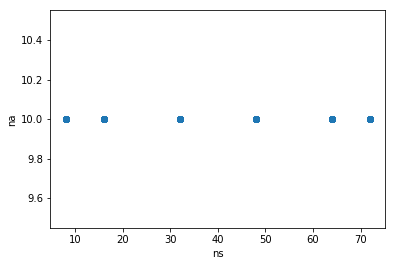

iop_study_72x10_
LOAD FAILED.
verify_nokelp_asym_b_scat_ss_sm_th_a05_128x12
LOAD FAILED.
verify_ss_noscat_const_abs_scat_1x20x2
LOAD FAILED.
verify_kelp_th_bad_abspt_ss_a05_b03_scat1_test_100x8_few
LOAD FAILED.
verify_kelp_none_1d_noscat_nz_1000


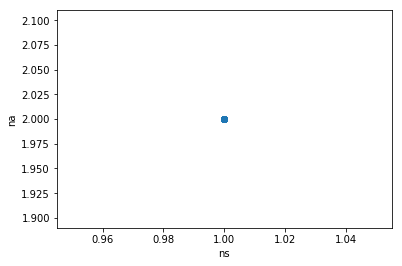

TEST_verify_kelp_better_abspt007_gb02_std1_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_32x8


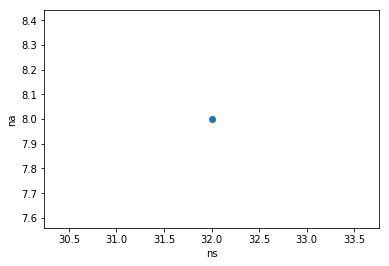

verify_ss_noscat_nofd_128x8


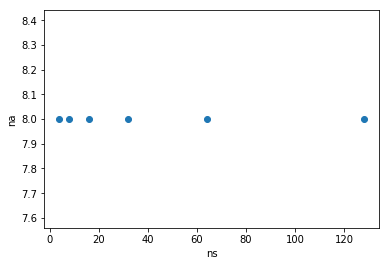

real_kelp_grid_study_72x10_haoce11_fix_bc


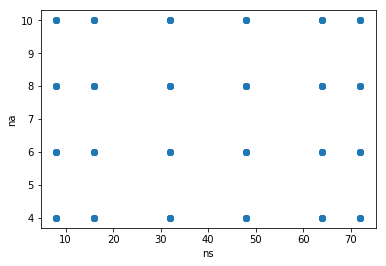

verify_nokelp_asym_b_scat_ss_sm_th_a05_32x8


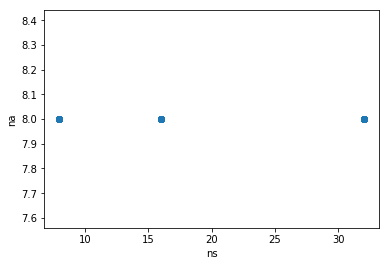

verify_asym_noscat_1d_variable_abs_200


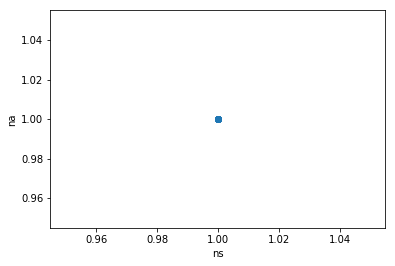

verify_fd_ss_64x8_nsm1


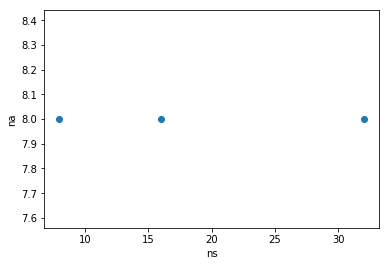

verify_kelp_none_1d_noscat_nz_1000.0
LOAD FAILED.
backup15-list.txt
LOAD FAILED.
mms_verify_asym_and_fd_prod_a_tanhb_L_lin_vsf_32x32x18_scat_0_1_2_3_b_m05_0


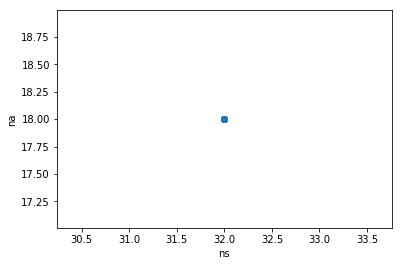

verify_nokelp_flat_asym_b_scat_ss_sm_th_a05_32x18


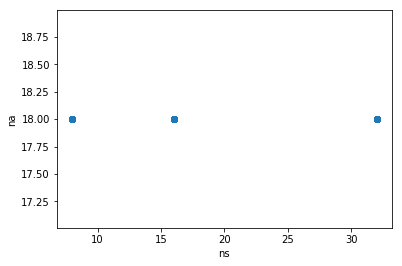

verify_kelp_better_abspt007_fr5_gb02_std1_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8


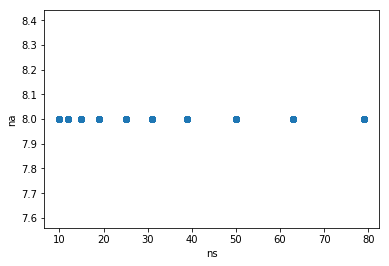

verify_nokelp_asym_b_scat_ss_sm_th_a05_128x10
LOAD FAILED.
verify_nokelp_asym_b_scat_ss_sm_th_a05_32x20


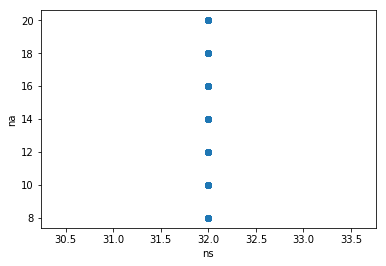

verify_asym_prod_a_tanhb_L_lin_vsf_64x128x8_scat_0_1_2_3_b_m05_0
LOAD FAILED.
verify_kelp_better_abspt001_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8


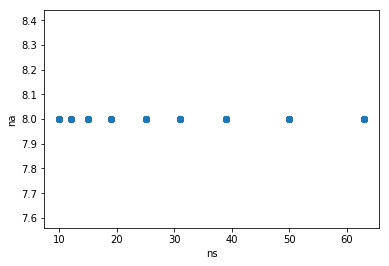

verify_asym_prod_a_tanhb_L_lin_vsf_64x64x8_scat_0_1_2_3_b_m05_2


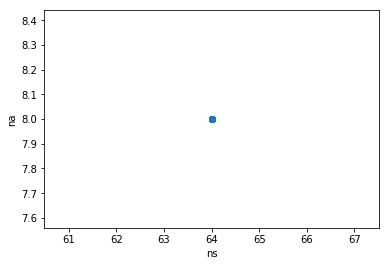

iop_study_72x10_fix_bc_copy
LOAD FAILED.
verify_nokelp_asym_b_scat_ss_sm_th_a05_64x12


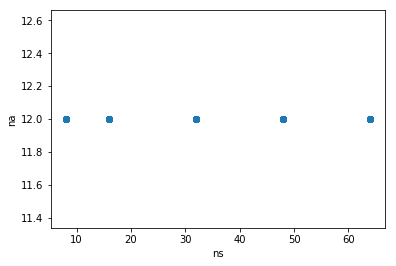

verify_kelp_better_abspt_std3_ft2_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8
LOAD FAILED.
verify_asym_uni_a_expb15_L_1x4000x2_scat_0_1_2_3_b_m15_0


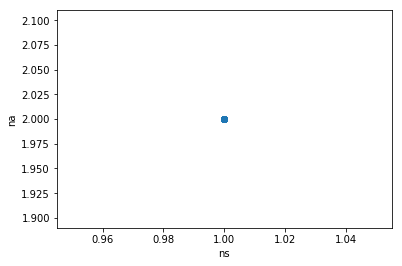

verify_asym_prod_a_tanhb_L_lin_vsf_64x64x10_scat_0_1_2_3_b_m05_0


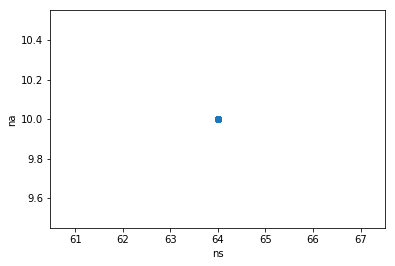

verify_asym_uni_a_expb15_L_1x10000x2_scat_0_1_2_3_b_m15_0
LOAD FAILED.
real_kelp_grid_study_72x10_haoce11


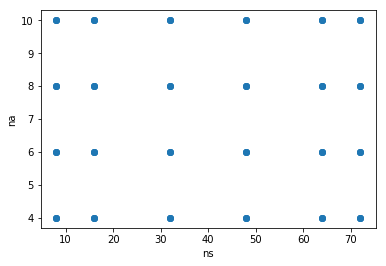

verify_kelp_better_abspt0007_fr2_gb3_std1_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8


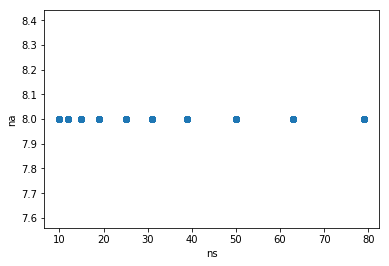

verify_kelp_abspt007_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8


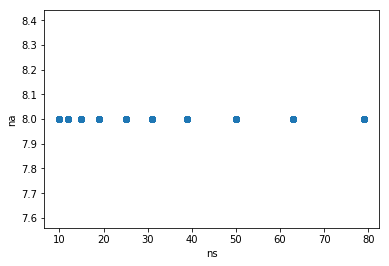

verify_ss_noscat_fd_32x8
LOAD FAILED.
verify_nokelp_asym_b_scat_ss_sm_th_a05_79x8


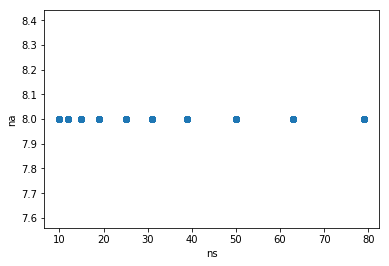

verify_kelp_better_abspt01_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8


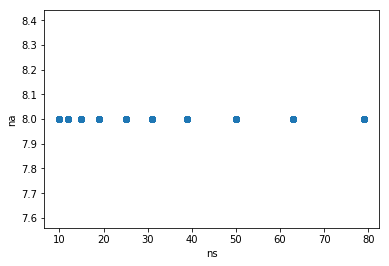

verify_asym_uni_a_expb_L_100x100x20_scat_0_1_2_b_m3_3
LOAD FAILED.
verify_asym_uni_a_expb_L_1x20x2_scat_0_1_2_b_m3_3


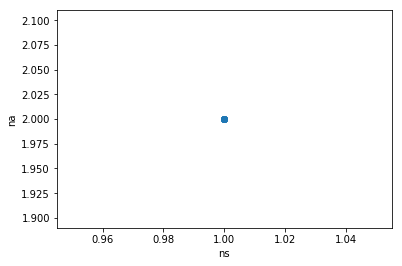

In [ ]:
for study_name in os.listdir(base_dir):
    print(study_name)
    try:
        df = view_results(study_name)
        plt.figure()
        plt.plot(df['ns'], df['ntheta'], 'o')
        plt.xlabel('ns')
        plt.ylabel('na')
        plt.show()
    except sqlite3.OperationalError:
        print("LOAD FAILED.")

In [14]:
print("hi")

hi


In [8]:
print('\n'.join(["'{}'".format(path) for path in os.listdir(base_dir)]))

'verify_nokelp_asym_b_scat_ss_sm_th_a05_128x12'
'verify_ss_noscat_const_abs_scat_1x20x2'
'verify_kelp_th_bad_abspt_ss_a05_b03_scat1_test_100x8_few'
'verify_kelp_none_1d_noscat_nz_1000'
'TEST_verify_kelp_better_abspt007_gb02_std1_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_32x8'
'verify_ss_noscat_nofd_128x8'
'verify_asym_noscat_1d_variable_abs_200'
'verify_fd_ss_64x8_nsm1'
'verify_kelp_none_1d_noscat_nz_1000.0'
'verify_kelp_better_abspt007_fr5_gb02_std1_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8'
'verify_nokelp_asym_b_scat_ss_sm_th_a05_128x10'
'verify_nokelp_asym_b_scat_ss_sm_th_a05_32x20'
'verify_asym_prod_a_tanhb_L_lin_vsf_64x128x8_scat_0_1_2_3_b_m05_0'
'verify_kelp_better_abspt001_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8'
'verify_asym_prod_a_tanhb_L_lin_vsf_64x64x8_scat_0_1_2_3_b_m05_2'
'verify_nokelp_asym_b_scat_ss_sm_th_a05_64x12'
'verify_kelp_better_abspt_std3_ft2_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8'
'verify_asym_uni_a_expb15_L_1x4000x2_scat_0_1

In [10]:
#study_name = 'verify_asym_uni_a_expb_L_40x80x30_scat_0_1_2_b_m3_3'
#study_name = 'verify_kelp_bad_abspt_asym_b_scat_ss_sm_th_a05_100x8'
study_name = 'verify_kelp_th_bad_abspt_1d_noscat_nz_100'

In [21]:
recent_studies = [
    'verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8',
    'verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8',
    'verify_kelp_better_abspt01_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8',
    'verify_kelp_better_abspt001_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8',
    'verify_kelp_better_abspt_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8'
]

In [20]:
study_name = 'iop_study_72x10_fix_bc'

In [9]:
study_name = 'real_kelp_grid_study_72x10_haoce11_fix_bc'

In [21]:
print("hi")

hi


In [23]:
for study_name in [study_name]:#recent_studies:
    study_dir = os.path.join(
        base_dir,
        study_name
    )

    ru.combine_dbs(study_dir, study_name)

Combined DB exists - deleting.
Opening combined db: /scratch/kelp-results/iop_study_72x10_fix_bc/iop_study_72x10_fix_bc.db
Connected.
Finished combining DBs.


In [20]:
conn = sqlite3.connect(os.path.join(study_dir,'{}.db'.format(study_name)))

In [30]:
res = ka.query_results(conn, study_name, base_dir, na=10,ns=72, fd_flag=False)

In [36]:
rad0 = res[0]['rad'][:].data
rad1 = res[1]['rad'][:].data

In [37]:
np.max(rad0-rad1)

0.0

In [11]:
import re

In [54]:
for study_name in recent_studies:
    print(study_name)
    #study_dir = os.path.join(
    #    base_dir,
    #    study_name
    #)
    df = view_results(study_name)
    bad_inds = np.logical_and(
        df['fd_flag'],
        np.logical_or(
            df['lis_resid'] > 1e-12,
            df['num_scatters'] < 0
        )
    )
    cols = ['num_scatters','b', 'absorptance_kelp', 'lis_resid', 'lis_iter', 'git_commit']
    nbad = sum(bad_inds)
    print("{} bad".format(nbad))
    if nbad == 0:
        display(df.loc[(df['fd_flag']==True), cols].iloc[:2,:])
    else:
        display(df.loc[bad_inds, cols])
    for i in range(nbad):
        data_path = df.loc[bad_inds, 'data_path'].iloc[i]
        db_path = re.sub('.nc$','.db', data_path)
        os.remove(data_path)
        os.remove(db_path)
        print(data_path)
        print(db_path)
    print()

verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8
360 bad


,num_scatters,b,absorptance_kelp,lis_resid,lis_iter,git_commit
4,-1,0.359381,0.07,5.908422e-13,56,5b933b79309f1e6f124ae49f5133ea8a7011dad4
6,-1,0.316228,0.07,6.454332e-13,57,5b933b79309f1e6f124ae49f5133ea8a7011dad4
10,-1,0.408424,0.07,5.323043e-13,57,5b933b79309f1e6f124ae49f5133ea8a7011dad4
15,-1,0.464159,0.07,3.772416e-13,56,5b933b79309f1e6f124ae49f5133ea8a7011dad4
20,-1,0.527500,0.07,8.026523e-13,54,5b933b79309f1e6f124ae49f5133ea8a7011dad4
26,-1,0.599484,0.07,4.576481e-13,53,5b933b79309f1e6f124ae49f5133ea8a7011dad4
30,-1,0.681292,0.07,1.049627e-13,54,5b933b79309f1e6f124ae49f5133ea8a7011dad4
35,-1,0.774264,0.07,6.959556e-13,49,5b933b79309f1e6f124ae49f5133ea8a7011dad4
40,-1,0.879923,0.07,6.527824e-13,48,5b933b79309f1e6f124ae49f5133ea8a7011dad4
45,-1,1.000000,0.07,3.430809e-13,48,5b933b79309f1e6f124ae49f5133ea8a7011dad4


/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/ojuv1_mr.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/ojuv1_mr.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/5w3lau9u.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/5w3lau9u.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/r5dmef5z.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/r5dmef5z.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/nt8l8y25.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/nt8l8y25.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_asym_b_scat_ss_sm_th_a05_79x8/data/r10c

,num_scatters,b,absorptance_kelp,lis_resid,lis_iter,git_commit
0,-1,0.100000,0.07,1.165983e-13,100,5b933b79309f1e6f124ae49f5133ea8a7011dad4
5,-1,0.125893,0.07,3.981694e-13,99,5b933b79309f1e6f124ae49f5133ea8a7011dad4
10,-1,0.158489,0.07,3.430379e-13,91,5b933b79309f1e6f124ae49f5133ea8a7011dad4
15,-1,0.199526,0.07,4.393577e-13,87,5b933b79309f1e6f124ae49f5133ea8a7011dad4
20,-1,0.251189,0.07,6.568475e-13,82,5b933b79309f1e6f124ae49f5133ea8a7011dad4
25,-1,0.316228,0.07,4.142257e-13,78,5b933b79309f1e6f124ae49f5133ea8a7011dad4
29,-1,0.398107,0.07,9.341998e-13,74,5b933b79309f1e6f124ae49f5133ea8a7011dad4
36,-1,0.501187,0.07,8.461533e-13,69,5b933b79309f1e6f124ae49f5133ea8a7011dad4
40,-1,0.630957,0.07,1.739751e-13,69,5b933b79309f1e6f124ae49f5133ea8a7011dad4
45,-1,0.794328,0.07,6.717497e-13,67,5b933b79309f1e6f124ae49f5133ea8a7011dad4


/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/l0ecdb4c.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/l0ecdb4c.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/ivy9vnle.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/ivy9vnle.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/h1r1ggn_.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/h1r1ggn_.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/epfsgjy6.nc
/scratch/kelp-results/verify_kelp_better_abspt_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/epfsgjy6.db
/scratch/kelp-results/verify_kelp_better_abspt_std3_peri

,num_scatters,b,absorptance_kelp,lis_resid,lis_iter,git_commit
0,-1,0.100000,0.1,0.441823,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
5,-1,0.125893,0.1,0.437985,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
10,-1,0.158489,0.1,0.433337,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
15,-1,0.199526,0.1,0.427788,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
20,-1,0.251189,0.1,0.421258,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
25,-1,0.316228,0.1,0.413764,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
30,-1,0.398107,0.1,0.405486,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
40,-1,0.630957,0.1,0.388317,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
45,-1,0.794328,0.1,0.380455,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4
54,-1,1.000000,0.1,0.372745,5001,5b933b79309f1e6f124ae49f5133ea8a7011dad4


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/kelp-results/verify_kelp_better_abspt01_ft2_std3_periodic_abs_qd101_asym_b_scat_ss_sm_th_a05_79x8/data/b5gwjxt0.nc'

In [14]:
df = view_results(study_name)

OperationalError: no such table: real_kelp_grid_study_72x10_haoce11_fix_bc_copy

In [29]:
df[['b','num_scatters','fd_flag']].loc[df['ns']==10,:]

,b,num_scatters,fd_flag
0,0.316228,1,0
1,0.316228,0,0
2,0.359381,2,0
3,0.316228,3,0
4,0.316228,2,0
5,0.359381,0,0
6,0.359381,1,0
7,0.408424,0,0
8,0.359381,3,0
9,0.408424,1,0


In [16]:
import pandas as pd

In [17]:
df[['b','num_scatters']].sort_values(['b','num_scatters'])

,b,num_scatters
1,0.316228,0
43,0.316228,0
80,0.316228,0
123,0.316228,0
149,0.316228,0
199,0.316228,0
245,0.316228,0
280,0.316228,0
320,0.316228,0
357,0.316228,0
